# Importando bibliotecas

In [1095]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Semente

In [1096]:
SEED = 42

# Carregando dados

In [1097]:
pd.set_option('display.max_columns', None)

In [1098]:
dados_original = pd.read_excel('Leontis.xlsx')
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


# Tratando dataframe

In [1099]:
dados = dados_original.copy()

## Escolhendo colunas

In [1100]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [1101]:
dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)
dados.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [1102]:
dados.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

dados.isna().sum()

Em qual faixa etária você se encaixa?                                                                                                                     0
Com qual gênero você se identifica?                                                                                                                       0
Qual seu nível de formação atual?                                                                                                                         0
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)    0
Há quanto tempo você se interessa por arte?                                                                                                               0
Qual das opções de arte abaixo você mais gosta?                                                                                                           0
Com que frequência você vai aos museus?                         

# Analisando dados únicos

In [1103]:
for i in dados:
    print(i)
    print(dados[i].unique())
    print()
    print("=" * 30)

Em qual faixa etária você se encaixa?
['Menos de 18 anos' 'Entre 25 e 35 anos' 'Entre 46 e 59 anos'
 'Entre 36 e 45 anos' 'Entre 18 e 24 anos' '60+ anos']

Com qual gênero você se identifica?
['Masculino' 'Feminino' 'Outro']

Qual seu nível de formação atual?
['Cursando ensino médio' 'Ensino superior concluído'
 'Cursando ensino superior' 'Cursando ensino fundamental'
 'Ensino fundamental incompleto' 'Ensino superior incompleto/não iniciado'
 'Ensino médio incompleto']

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
['Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$ 7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil']

Há quanto tempo você se interessa por arte?
['Menos de 2 anos' 'Não me interesso' 'De 2 a 4 anos'
 'Estou iniciando agora' 'Há mais de 10 anos' 'De 5 a 9 anos']

Qual das opções de arte abaixo você mais gosta?
['Fotografia' 

# Modelo não supervisionado cru

In [1104]:
df = dados.copy()

In [1105]:
df.isna().sum()

Em qual faixa etária você se encaixa?                                                                                                                     0
Com qual gênero você se identifica?                                                                                                                       0
Qual seu nível de formação atual?                                                                                                                         0
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)    0
Há quanto tempo você se interessa por arte?                                                                                                               0
Qual das opções de arte abaixo você mais gosta?                                                                                                           0
Com que frequência você vai aos museus?                         

## Transformando em numérico

In [1106]:
for i in df:
    print(i)
    if df[i].dtype == object:
        dados_unique = df[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

    df[i] = df[i].map(mapeamento)

Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?


## Verificando o melhor número de clusters

### Utilizando The Elbow Method

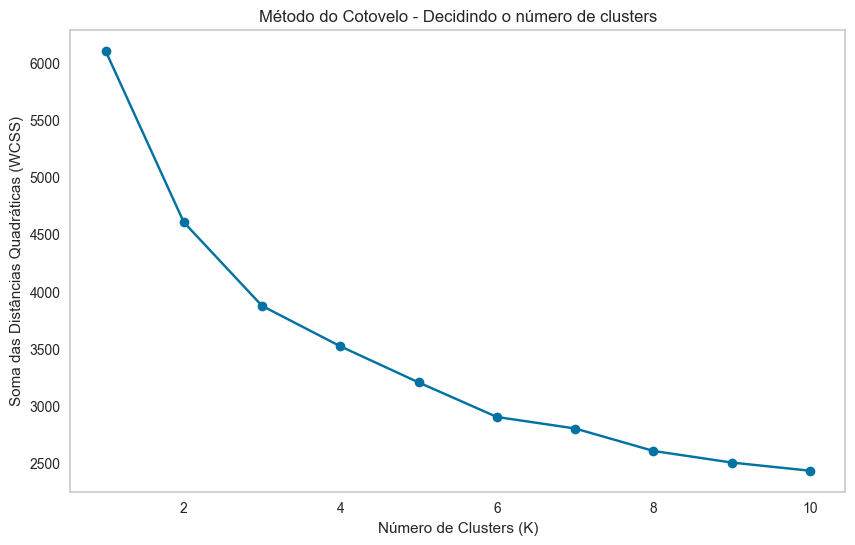

In [1107]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=SEED)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo - Decidindo o número de clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadráticas (WCSS)')
plt.grid()
plt.show()

É possível notar uma maior quebra com 3 clusters

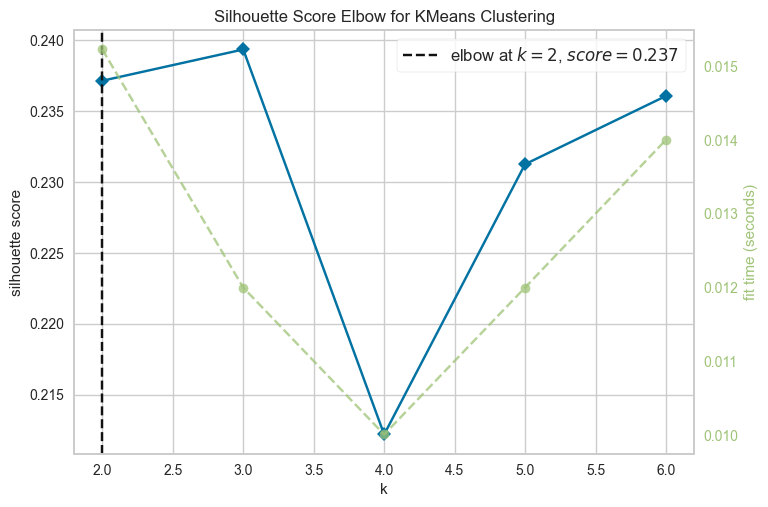

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [1108]:
from sklearn.cluster import KMeans

model = KMeans(df, random_state=SEED)
visualizer = KElbowVisualizer(model, k=6, metric="silhouette", distance_metric='euclidean')

visualizer.fit(df)
visualizer.show()

Utilizando este código ele já indica o melhor k em consideração da quebra

## Aplicando modelo

In [1109]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=SEED, n_init="auto")

modelo.fit(df)

centers = modelo.cluster_centers_  

labels_3 = modelo.labels_

print(labels_3)

[1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]


In [1110]:
dados['Cluster'] = labels_3

In [1111]:
centers

array([[2.2300885 , 0.31858407, 4.73451327, 1.4159292 , 3.18584071,
        4.13274336, 3.65486726, 0.98230088, 1.38938053, 2.05309735,
        0.53982301, 2.50442478, 1.30088496, 0.97345133, 4.37168142,
        1.33628319],
       [4.82962963, 0.45925926, 0.61481481, 1.64444444, 2.61481481,
        4.16296296, 3.68148148, 1.07407407, 1.54814815, 2.19259259,
        0.57037037, 2.79259259, 1.19259259, 0.79259259, 4.51111111,
        1.05925926]])

## Visualizando as características de cada cluster

In [1112]:
cluster_0 = dados.loc[dados['Cluster'] == 0]
cluster_1 = dados.loc[dados['Cluster'] == 1]

### Analisando Cluster 0

In [1113]:
cluster_0.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,0
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,0
6,Entre 36 e 45 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,0
8,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 2 a 4 anos,Fotografia,Raramente (uma vez ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,0
12,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,0


In [1114]:
for i in cluster_0:
    print(cluster_0[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    35
Entre 46 e 59 anos    26
Entre 36 e 45 anos    20
Entre 18 e 24 anos    18
60+ anos              14
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     77
Masculino    36
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  85
Ensino superior incompleto/não iniciado    13
Cursando ensino superior                   12
Ensino médio incompleto                     1
Cursando ensino médio                       1
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe B: entre R$ 7,1 mil e R$ 22 mil     43
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    42
Classe A: superior a R$ 22 mil             17
Classes D/E: até R$ 2,9 mil                11
Name: count, dtype: int64
Há quanto tempo você

#### Cluster 0

ANOTAÇÕES
- Cluster só com pessoas que não possuem interesse por arte, exceto um, que já fica satisfeito com as informações disponibilizadas nos museus
- <font color='yellow'>Não utilizariam o nosso aplicativo por não se interessarem por arte ou não sentir falta de informações</font>

### Analisando Cluster 1

In [1115]:
cluster_1.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,1
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,1
5,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,1
7,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,1


In [1116]:
for i in cluster_1:
    print(cluster_1[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      128
Entre 18 e 24 anos      5
Entre 46 e 59 anos      1
Entre 36 e 45 anos      1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     79
Masculino    50
Outro         6
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio            70
Cursando ensino fundamental      60
Ensino fundamental incompleto     3
Cursando ensino superior          2
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    62
Classe B: entre R$ 7,1 mil e R$ 22 mil     44
Classes D/E: até R$ 2,9 mil                18
Classe A: superior a R$ 22 mil             11
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso         37
De 2 a 4 anos            24
De 5 a 9 anos            24
Há mais de 10 anos       22
E

#### Cluster 1

ANOTAÇÕES
- Grande predominância de menores de 18 anos
- Predominância feminina neste cluster
- Renda per capita da casa é uma classe média alta
- Maior interesse por arte há mais de 10 anos
- Frequencia em museus baixa
- Todos sentem falta de informações nos museus
- Todos procuram saber mais sobre
- Quase metade não encontra as infromações faltantes
- <font color='yellow'>Possíveis utilizadores do app, já que sentem falta de informações e procuram saber sobre; se interessam mais por pinturas e fotografias. Porém a maioria das vezes encontram o que precisavam/esperavam e não costumam ir muito para o museu</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando ensino fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

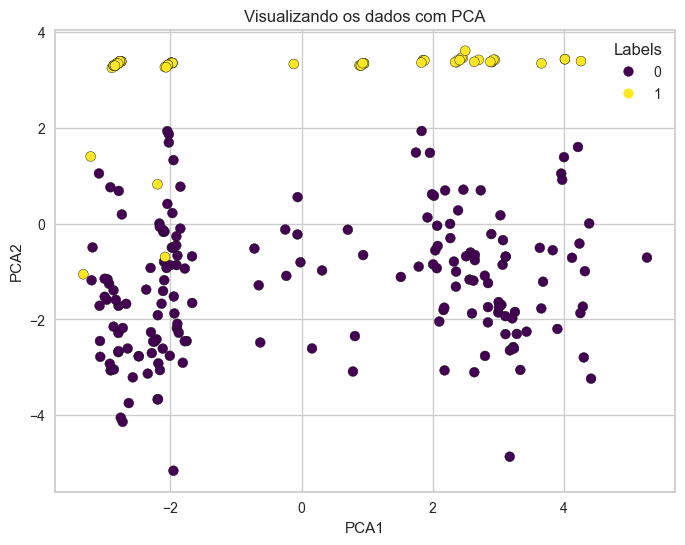

In [1117]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
x_normalizado = pd.concat([df, x_pca], axis=1)

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_normalizado['PCA1'], x_normalizado['PCA2'], c=labels_2, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

## Conclusão

Ao analisar cada cluster, concluí que o modelo crú não satisfaz nosso objetivo, sendo necessário fazer uma melhor separação das pessoas que possuem características mais atraentes para o aplicativo.

# Modelo não supervisionado com colunas relevantes e pesos

## Escolhendo e tratando colunas

In [1118]:
df_2 = dados.copy()
df_2.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações,0
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações,1
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,1
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações,0


In [1119]:
colunas_2 = ['Qual das opções de arte abaixo você mais gosta?', 'Com que frequência você vai aos museus?', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.', 'O que mais te atrai em visitar museus ou exposições de arte?', 'Você sente falta de mais informações sobre as obras nos museus?', 'Você procura saber sobre essas informações faltantes?', 'Você encontra o que precisa/esperava ao pesquisar?']
df_2  = df_2[colunas_2]
df_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações


In [1120]:
for i in df_2:
    print(df_2[i].unique())

['Fotografia' 'Não se interessa por arte' 'Escultura' 'Pintura'
 'Arte de rua/grafite' 'Arte digital' 'Arquitetura e Urbanismo']
['Raramente (uma vez ao ano)' 'Não se interessa por arte'
 'Ocasionalmente (máximo três vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)' 'Nunca'
 'Frequentemente (máximo cinco vezes ao ano)']
['Sem um guia/planejamento para ver as obras.' 'Não se interessa por arte'
 'Planejo minha rota antes.'
 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).'
 'Com um guia do próprio museu.']
['Lazer' 'Não se interessa por arte' 'Aprendizado' 'Inspiração'
 'Não visito' 'Apenas acompanho alguém']
['Sim, sinto falta de mais informações' 'Não vai a museus'
 'Não, acredito que o que tem no museu é o suficiente']
['Sim, procuro' 'Não sente falta de informações' 'Não, apenas me conformo']
['Não' 'Não procura essas informações' 'Sim']


In [1121]:
x_3 = df_2.copy()
x_3.fillna("#", inplace=True)

In [1122]:
x_3

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
...,...,...,...,...,...,...,...
243,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
244,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
245,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não
246,Arte digital,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações


### Aplicando pesos para características mais relevantes

In [1123]:
mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 5,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 1, 'Sim, sinto falta de mais informações': 8, 'Não, acredito que o que tem no museu é o suficiente': 2}
mapeamento_procurar_info = {'Não sente falta de informações': 1, 'Sim, procuro': 7, 'Não, apenas me conformo': 3}
mapeamento_achar_info = {'Não procura essas informações': 1, 'Sim': 3, 'Não': 8}
mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_achar_info}

In [1124]:
x_3

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações
...,...,...,...,...,...,...,...
243,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
244,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações
245,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não
246,Arte digital,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações


In [1125]:
for k, v in mapeamento_2.items():
    x_3[k] = x_3[k].map(v)

In [1126]:
x_3

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,8,5,2,6,8,7,8
1,0,0,0,0,1,1,1
2,6,8,2,10,2,1,1
3,8,8,2,6,8,3,1
4,8,9,10,9,8,3,1
...,...,...,...,...,...,...,...
243,8,8,2,9,2,1,1
244,8,5,2,10,2,1,1
245,8,5,2,9,8,7,8
246,4,5,2,6,8,3,1


In [1127]:
x_3.isna().sum()

Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.    0
O que mais te atrai em visitar museus ou exposições de arte?                                                                      0
Você sente falta de mais informações sobre as obras nos museus?                                                                   0
Você procura saber sobre essas informações faltantes?                                                                             0
Você encontra o que precisa/esperava ao pesquisar?                                                                                0
dtype: int64

### Normalizando

In [1128]:
from sklearn.preprocessing import StandardScaler

features = colunas_2
x_normalizado = x_3.loc[:, features].values
x_normalizado = StandardScaler().fit_transform(x_normalizado)

x_normalizado = pd.DataFrame(x_normalizado, columns=colunas_2)

## Verificando o melhor número de clusters

### Utilizando The Elbow Method

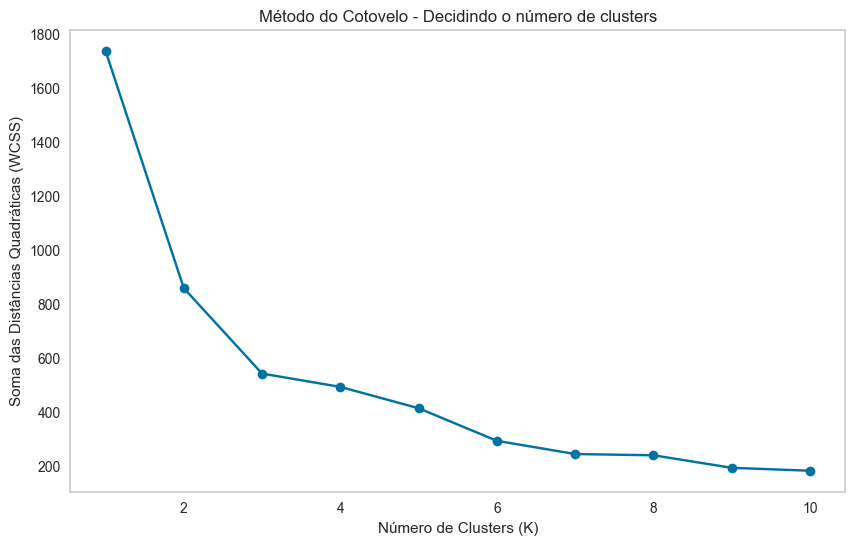

In [1129]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=SEED)
    kmeans.fit(x_normalizado)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo - Decidindo o número de clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadráticas (WCSS)')
plt.grid()
plt.show()

É possível notar uma maior quebra com 3 clusters

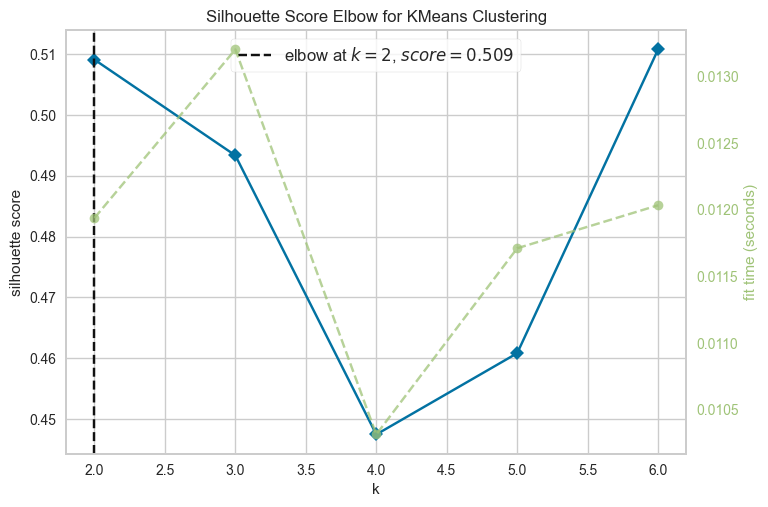

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [1130]:
model = KMeans(x_normalizado, random_state=SEED)
visualizer = KElbowVisualizer(model, k=6, metric="silhouette", distance_metric='euclidean')

visualizer.fit(x_normalizado)
visualizer.show()

Utilizando este código ele já indica o melhor k em consideração da quebra

## Aplicando modelo

In [1131]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=SEED, n_init="auto", algorithm='elkan', max_iter=500)

modelo.fit(x_normalizado)

centers = modelo.cluster_centers_  

labels_2 = modelo.labels_

print(labels_2)

[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


In [1132]:
df_2['Cluster'] = labels_2

## Visualizando características dos clusters

In [1133]:
cluster_0_2 = df_2.loc[df_2['Cluster'] == 0]
cluster_1_2 = df_2.loc[df_2['Cluster'] == 1]
cluster_2_2 = df_2.loc[df_2['Cluster'] == 2]


### Cluster 0

In [1134]:
cluster_0_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,0
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,0
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,0
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,0
7,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,0


In [1135]:
for i in cluster_0_2:
    print(cluster_0_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    66
Fotografia                 51
Arquitetura e Urbanismo    20
Arte digital               17
Escultura                  12
Arte de rua/grafite         8
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           85
Ocasionalmente (máximo três vezes ao ano)            56
Nunca                                                15
Frequentemente (máximo cinco vezes ao ano)           13
Muito frequentemente (mais de cinco vezes ao ano)     5
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         96
Com um guia do próprio museu.                                                                       28
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 1

In [1136]:
cluster_1_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,1
5,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,1
6,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,1
15,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,1
16,Arte digital,Nunca,Planejo minha rota antes.,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,1


In [1137]:
for i in cluster_1_2:
    print(cluster_1_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    66
Arte digital                  4
Pintura                       2
Arte de rua/grafite           1
Arquitetura e Urbanismo       1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Não se interessa por arte     66
Nunca                          4
Raramente (uma vez ao ano)     4
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Não se interessa por arte                                                                           66
Sem um guia/planejamento para ver as obras.                                                          4
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).     2
Planejo minha rota antes.                                                                            1
Com um guia do próprio museu.                                 

### Cluster 2

In [1138]:
cluster_2_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster


In [1139]:
for i in cluster_2_2:
    print(cluster_2_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Visualizando

In [1140]:
labels_2

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [1141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_normalizado)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
x_normalizado = pd.concat([x_normalizado, x_pca], axis=1)

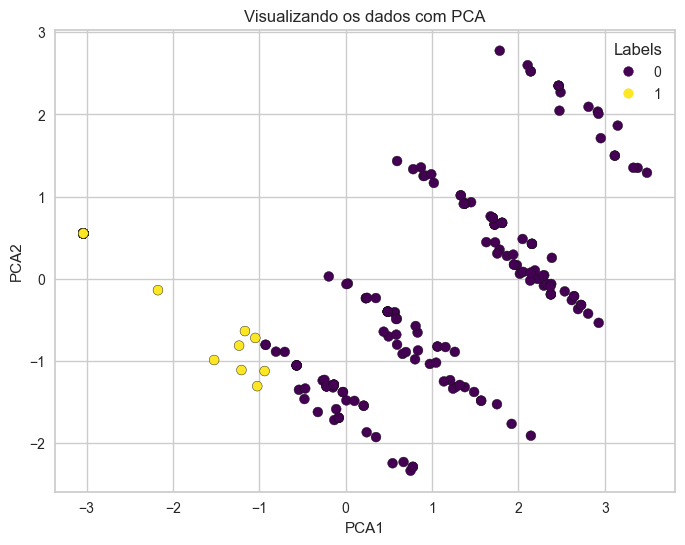

In [1142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_normalizado['PCA1'], x_normalizado['PCA2'], c=labels_2, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [1143]:
dados_2_c_label = dados_original.copy()
dados_2_c_label['Cluster'] = labels_2

In [1144]:
mapeamento_usa_app = {0: 'Não', 1: 'Sim', 2: 'Não'}
dados_2_c_label['Usaria o aplicativo?'] = dados_2_c_label['Cluster'].map(mapeamento_usa_app)
dados_2_c_label.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0,Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Sim
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,0,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,0,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,0,Não


In [1145]:
dados_2_c_label['Usaria o aplicativo?'].value_counts()

Usaria o aplicativo?
Não    174
Sim     74
Name: count, dtype: int64

In [1146]:
# dados_original.to_excel('dados_possiveis_usuarios_c_label_2_clusters.xlsx', index=False)

## Conclusão

Depois de testes, observei que apesar da melhora após a aplicação de boas práticas para este modelo, ele ainda segue podendo ter uma maior performance e divisão. Porém seus resultados são consideravelmente satisfatórios.

# Modelo não supervisionado com PCA

## Preparando a base

- Copiando a base original
- Excluindo colunas desnecessárias
- Substituindo nulos

In [1147]:
df_3 = dados.copy()
df_3 = df_3[colunas_2]
x_3 = df_3.copy()

In [1148]:
x_3.fillna("#", inplace=True)
for k, v in mapeamento_2.items():
    x_3[k] = x_3[k].map(v)

In [1149]:
x_3

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,8,5,2,6,8,7,8
1,0,0,0,0,1,1,1
2,6,8,2,10,2,1,1
3,8,8,2,6,8,3,1
4,8,9,10,9,8,3,1
...,...,...,...,...,...,...,...
243,8,8,2,9,2,1,1
244,8,5,2,10,2,1,1
245,8,5,2,9,8,7,8
246,4,5,2,6,8,3,1


## Aplicando PCA

In [1150]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = x_3.columns
x_3 = x_3.loc[:, features].values
x_normalizado_3 = StandardScaler().fit_transform(x_3)

pca_3 = PCA(n_components=2)
principais_componentes_3 = pca_3.fit_transform(x_normalizado_3)

x_pca_3 = pd.DataFrame(principais_componentes_3, columns=['PCA1', 'PCA2'])
x_normalizado_3 = pd.DataFrame(x_normalizado_3, columns=colunas_2)
x_normalizado_3 = pd.concat([x_normalizado_3, x_pca_3], axis=1)

In [1151]:
principais_componentes_3

array([[ 2.14151784e+00,  2.52503057e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [-3.09570690e-02, -1.37495414e+00],
       [ 8.31660474e-01, -6.52087265e-01],
       [ 1.92058695e+00, -1.76284228e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [-3.03777918e+00,  5.53521532e-01],
       [ 2.33575581e-01, -2.34463052e-01],
       [ 1.37853248e+00, -1.31619341e+00],
       [ 5.70311663e-01, -4.05874309e-01],
       [-8.08822181e-02, -1.68882477e+00],
       [ 8.70912957e-01,  1.35688441e+00],
       [ 9.73785527e-01, -1.03382470e+00],
       [ 6.57885288e-01, -9.12088019e-01],
       [ 2.48709581e+00,  2.26967993e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [-1.52345919e+00, -9.86237296e-01],
       [-5.41652849e-01, -1.34835725e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [ 2.46498096e+00,  2.34884320e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [-1.32488322e-01, -1.71625738e+00],
       [-3.03777918e+00,  5.53521532e-01],
       [-3.

In [1152]:
x_normalizado_3

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,PCA1,PCA2
0,0.894427,0.184644,-0.469694,0.088142,0.940204,1.321859,3.023039,2.141518,2.525031
1,-1.490712,-1.311816,-1.001586,-1.454869,-1.171301,-0.908216,-0.561657,-3.037779,0.553522
2,0.298142,1.082520,-0.469694,1.116817,-0.869658,-0.908216,-0.561657,-0.030957,-1.374954
3,0.894427,1.082520,-0.469694,0.088142,0.940204,-0.164858,-0.561657,0.831660,-0.652087
4,0.894427,1.381812,1.657871,0.859648,0.940204,-0.164858,-0.561657,1.920587,-1.762842
...,...,...,...,...,...,...,...,...,...
243,0.894427,1.082520,-0.469694,0.859648,-0.869658,-0.908216,-0.561657,0.100456,-1.483275
244,0.894427,0.184644,-0.469694,1.116817,-0.869658,-0.908216,-0.561657,-0.137301,-1.286653
245,0.894427,0.184644,-0.469694,0.859648,0.940204,1.321859,3.023039,2.464981,2.348843
246,-0.298142,0.184644,-0.469694,0.088142,0.940204,-0.164858,-0.561657,0.007615,-0.062637


In [1153]:
# df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
# x = pd.concat([df_3, df_pca], axis=1)
# df_3.head()

## Verificando o melhor número de clusters

### Utilizando The Elbow Method

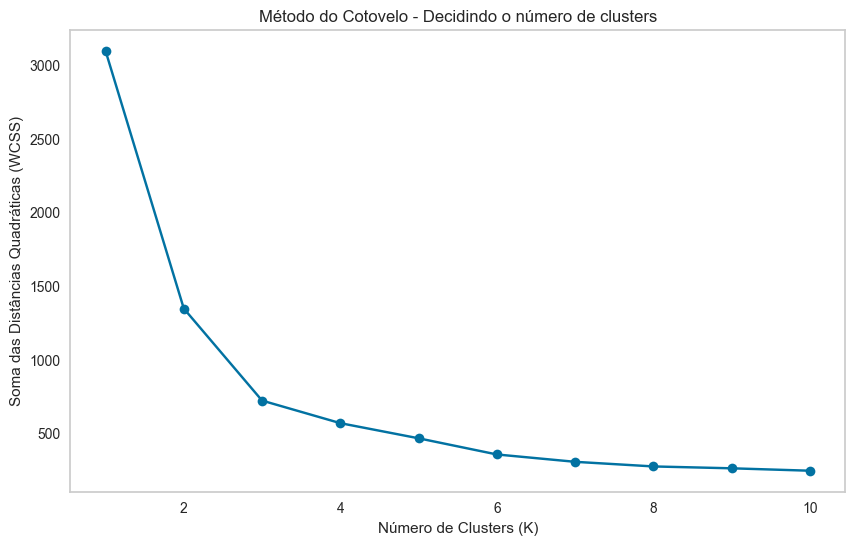

In [1154]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=SEED)
    kmeans.fit(x_normalizado_3)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo - Decidindo o número de clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadráticas (WCSS)')
plt.grid()
plt.show()

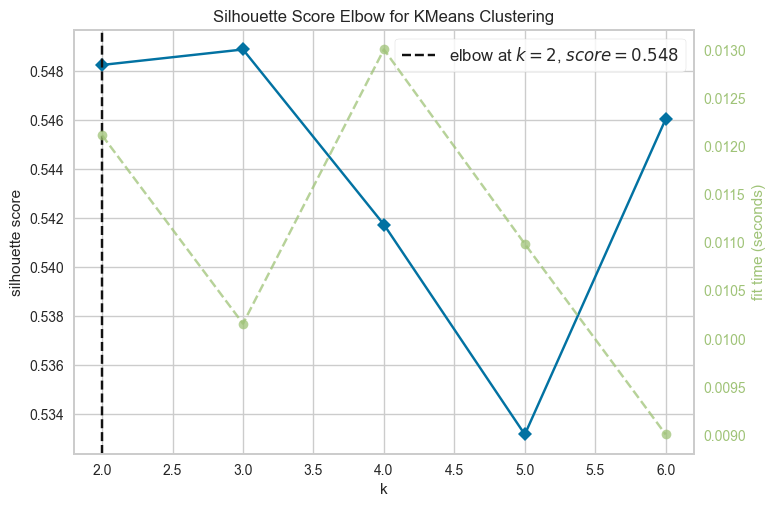

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [1155]:
model = KMeans(x_normalizado_3, random_state=SEED)
visualizer = KElbowVisualizer(model, k=6, metric="silhouette", distance_metric='euclidean')

visualizer.fit(x_normalizado_3)
visualizer.show()

## Criando o modelo com quantidade de clusters recomendada

In [1156]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=SEED, n_init="auto")

modelo.fit(x_normalizado_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels_3 = modelo.labels_

print(labels_3)

[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


## Visualizando clusters

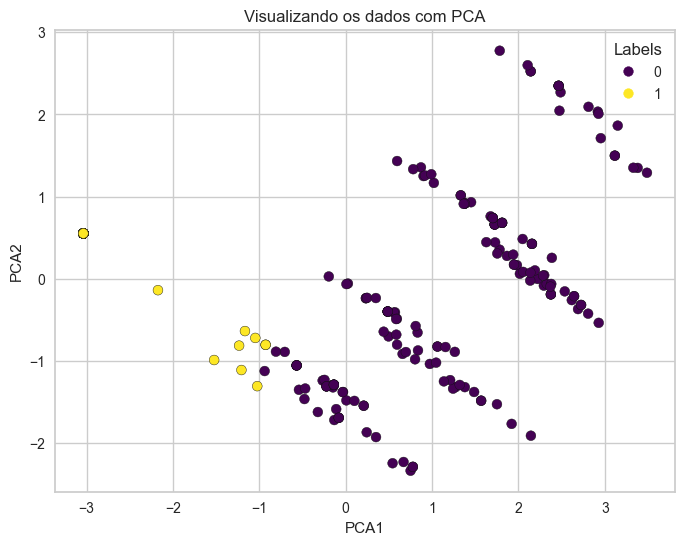

In [1157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_normalizado_3['PCA1'], x_normalizado_3['PCA2'], c=labels_3, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [1158]:
df_3['Cluster'] = labels_3

In [1159]:
cluster_0_3 = df_3.loc[df_3['Cluster'] == 0]
cluster_1_3 = df_3.loc[df_3['Cluster'] == 1]

### Cluster 0

In [1160]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    66
Fotografia                 51
Arte digital               18
Arquitetura e Urbanismo    18
Escultura                  12
Arte de rua/grafite         8
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           83
Ocasionalmente (máximo três vezes ao ano)            56
Nunca                                                16
Frequentemente (máximo cinco vezes ao ano)           13
Muito frequentemente (mais de cinco vezes ao ano)     5
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         94
Com um guia do próprio museu.                                                                       28
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 1

In [1161]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    66
Arte digital                  3
Arquitetura e Urbanismo       3
Pintura                       2
Arte de rua/grafite           1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Não se interessa por arte     66
Raramente (uma vez ao ano)     6
Nunca                          3
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Não se interessa por arte                                                                           66
Sem um guia/planejamento para ver as obras.                                                          6
Planejo minha rota antes.                                                                            1
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).     1
Com um guia do próprio museu.                                 

## Criando o modelo com melhor filtragem

In [1162]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3, random_state=SEED, n_init="auto")

modelo.fit(x_normalizado_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels_3 = modelo.labels_

print(labels_3)

[0 2 1 1 1 2 2 1 1 1 1 0 1 1 0 2 1 1 2 0 2 1 2 2 0 2 2 1 2 0 0 0 2 1 1 2 1
 0 1 2 1 1 1 0 0 2 2 1 0 2 2 0 1 1 2 0 2 1 2 0 1 2 0 2 1 1 0 1 0 1 1 2 1 1
 0 1 1 0 2 2 0 2 2 2 0 1 2 1 1 1 1 0 0 1 1 1 2 0 0 1 0 2 1 1 1 1 0 1 0 2 1
 2 1 0 0 2 0 2 2 1 1 0 2 1 1 1 2 0 1 1 1 2 0 1 0 1 2 2 1 0 0 0 0 2 2 2 1 2
 1 0 0 0 2 0 0 2 0 0 2 1 2 2 0 2 0 1 0 2 0 0 1 0 1 1 2 1 1 0 0 1 0 0 0 0 0
 1 2 0 0 2 2 1 1 2 0 0 0 1 2 0 1 2 1 0 0 0 1 1 0 0 2 0 1 1 1 2 0 2 1 1 0 1
 2 1 0 1 1 0 0 2 0 1 0 1 0 0 0 0 1 0 2 2 0 1 1 0 1 1]


## Visualizando clusters

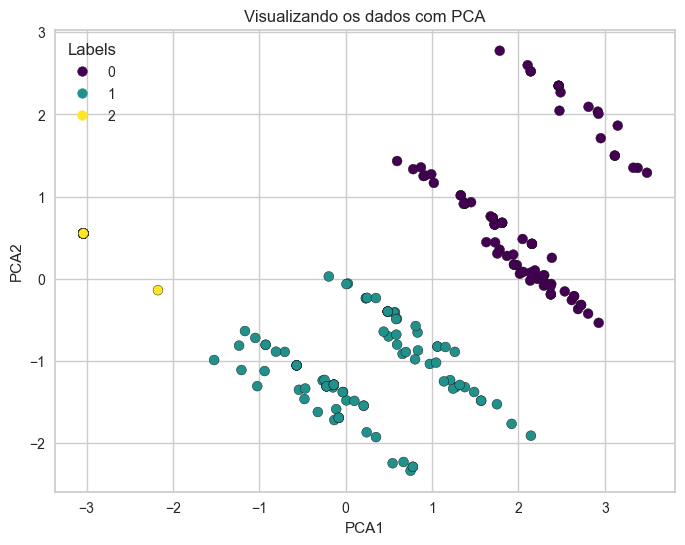

In [1163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_normalizado_3['PCA1'], x_normalizado_3['PCA2'], c=labels_3, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [1164]:
df_3_2 = df_3.copy()
df_3_2['Cluster'] = labels_3

In [1165]:
cluster_0_3 = df_3_2.loc[df_3_2['Cluster'] == 0]
cluster_1_3 = df_3_2.loc[df_3_2['Cluster'] == 1]
cluster_2_3 = df_3_2.loc[df_3_2['Cluster'] == 2]

### Cluster 0

In [1166]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    33
Fotografia                 26
Arte digital                9
Arquitetura e Urbanismo     9
Escultura                   6
Arte de rua/grafite         3
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           42
Ocasionalmente (máximo três vezes ao ano)            32
Nunca                                                 5
Frequentemente (máximo cinco vezes ao ano)            5
Muito frequentemente (mais de cinco vezes ao ano)     2
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         46
Planejo minha rota antes.                                                                           14
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 1

In [1167]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    35
Fotografia                 25
Arquitetura e Urbanismo    12
Arte digital               11
Escultura                   6
Arte de rua/grafite         6
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           47
Ocasionalmente (máximo três vezes ao ano)            24
Nunca                                                13
Frequentemente (máximo cinco vezes ao ano)            8
Muito frequentemente (mais de cinco vezes ao ano)     3
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         53
Com um guia do próprio museu.                                                                       16
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 2

In [1168]:
for i in cluster_2_3:
    print(cluster_2_3[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Não se interessa por arte    66
Arte digital                  1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Não se interessa por arte    66
Nunca                         1
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Não se interessa por arte                      66
Sem um guia/planejamento para ver as obras.     1
Name: count, dtype: int64
O que mais te atrai em visitar museus ou exposições de arte?
Não se interessa por arte    66
Não visito                    1
Name: count, dtype: int64
Você sente falta de mais informações sobre as obras nos museus?
Não vai a museus    67
Name: count, dtype: int64
Você procura saber sobre essas informações faltantes?
Não sente falta de informações    67
Name: count, dtype: int64
Você encontra o que precisa/esperava ao pesquisar?
Não procura essas informações    67
Name: count

## Conclusão

Conclui que utilizando 3 clusters (recomendado para meu modelo) ele generaliza mais os dados, sendo o cluster 0 um grupo de pessoas que provavelmente se interessaria mais em nosso aplicativo e o instalaria. Porém, só podemos ter uma maior separação quando utilizamos um modelo de 4 clusters, dividindo assim em dois o que era no modelo anterior, o cluster 0. Assim temos uma nova separação: cluster 0 e cluster 3

- Cluster 0: grupo de pessoas que provavelmente instalariam o aplicativo mas não o usariam com frequência
- Cluster 3: grupo de pessoas que provavelmente instalariam e fariam um maior uso do aplicativo, uma vez que frequentam mais museus, utilizam mais guias e pesquisam quando sentem falta de informações.

Para o modelo supervisionado, apesar da diferença de dados de pessoas que <strong>*não usariam o aplicativo*</strong> para que <strong>*usariam o aplicativo*</strong>, vamos usar o resultado com o de 4 clusters, definindo que pessoas do cluster 0 não usariam e pessoas do cluster 3, usariam nosso aplicativo.

## Exportando

### Criando dataframe para exportar

In [1169]:
dados_3_c_label = dados_original.copy()
mapeamento_3 = {0: 'Sim', 1: 'Não', 2: 'Não'}
dados_3_c_label['Usaria o aplicativo?'] = df_3_2['Cluster'].map(mapeamento_3)
dados_3_c_label

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,2024-08-24 23:28:30,2024-08-24 23:33:34,anonymous,NaN,NaN,60+ anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
244,245,2024-08-27 09:36:57,2024-08-27 09:40:23,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
245,246,2024-08-30 07:30:02,2024-08-30 07:32:08,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
246,247,2024-09-01 11:44:46,2024-0

In [1170]:
dados_3_c_label['Usaria o aplicativo?'].value_counts()

Usaria o aplicativo?
Não    162
Sim     86
Name: count, dtype: int64

### Exportando

In [1171]:
dados_3_c_label.to_excel('dados_possiveis_usuarios_c_label.xlsx', index = False)